In [1]:
import tensorflow as tf
import numpy as np

In [2]:
interpreter = tf.lite.Interpreter(model_path="mbv1_1.0_12_90_68.4.tflite")
interpreter.allocate_tensors()

In [3]:
stuff = interpreter.get_tensor_details()

In [4]:
stuff

[{'name': 'Const',
  'index': 0,
  'shape': array([1, 1, 3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'ConstantFolding/truediv_recip',
  'index': 1,
  'shape': array([1, 1, 3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'float_image_input',
  'index': 2,
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'resnet_model/Pad',
  'index': 3,
  'shape': array([  1, 226, 226,   3], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'resnet_model/Pad/paddings',
  'index': 4,
  'shape': array([4, 2], dtype=int32),
  'dtype': numpy.int32,
  'quantization': (0.0, 0)},
 {'name': 'resnet_model/Pad_1',
  'index': 5,
  'shape': array([  1, 114, 114,  64], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0)},
 {'name': 'resnet_model/Pad_1/paddings',
  'index': 6,
  'shape': array([4, 2], dtype=int32),
  'dtype': numpy.i

In [12]:
weight_tensors_meta = []
weight_tensors = []

for j in range(len(stuff)):
    if "kernel" in stuff[j]['name']:
        weight_tensors_meta.append(stuff[j])
        weight_tensors.append(interpreter.get_tensor(j))
        name = weight_tensors_meta[-1]['name'].split("/")[1]
        print(name, weight_tensors[-1].shape)
        np.save(name + "_kernel.npy",weight_tensors[-1])
#         if "depthwise" not in name:
#             np.save(name + ".npy",weight_tensors[-1].squeeze().transpose())
#         else:
#             np.save(name + ".npy",np.transpose(weight_tensors[-1],[3,0,1,2]))

final_dense (1000, 1024)
initial_conv (32, 3, 3, 3)


In [11]:
bias_tensors_meta = []
bias_tensors = []

for j in range(len(stuff)):
    if "bias" in stuff[j]['name']:
        bias_tensors_meta.append(stuff[j])
        bias_tensors.append(interpreter.get_tensor(j))
        name = bias_tensors_meta[-1]['name'].split("/")[1]
        print(name, bias_tensors[-1].shape)
        
        np.save(name + "_bias.npy",bias_tensors[-1].squeeze())

contraction_1x1_0 (64,)
contraction_1x1_1 (128,)
contraction_1x1_10 (512,)
contraction_1x1_11 (1024,)
contraction_1x1_12 (1024,)
contraction_1x1_2 (128,)
contraction_1x1_3 (256,)
contraction_1x1_4 (256,)
contraction_1x1_5 (512,)
contraction_1x1_6 (512,)
contraction_1x1_7 (512,)
contraction_1x1_8 (512,)
contraction_1x1_9 (512,)
depthwise_nxn_0 (32,)
depthwise_nxn_1 (64,)
depthwise_nxn_10 (512,)
depthwise_nxn_11 (512,)
depthwise_nxn_12 (1024,)
depthwise_nxn_2 (128,)
depthwise_nxn_3 (128,)
depthwise_nxn_4 (256,)
depthwise_nxn_5 (256,)
depthwise_nxn_6 (512,)
depthwise_nxn_7 (512,)
depthwise_nxn_8 (512,)
depthwise_nxn_9 (512,)
final_dense (1000,)
initial_conv (32,)


In [8]:
weight_tensors_meta = []
weight_tensors = []

for j in range(len(stuff)):
    if "weight" in stuff[j]['name']:
        weight_tensors_meta.append(stuff[j])
        weight_tensors.append(interpreter.get_tensor(j))
        name = weight_tensors_meta[-1]['name'].split("/")[1]
        print(name, weight_tensors[-1].shape)
        if "depthwise" not in name:
            np.save(name + ".npy",weight_tensors[-1].squeeze().transpose())
        else:
            np.save(name + ".npy",np.transpose(weight_tensors[-1],[3,0,1,2]))

contraction_1x1_0 (64, 1, 1, 32)
contraction_1x1_1 (128, 1, 1, 64)
contraction_1x1_10 (512, 1, 1, 512)
contraction_1x1_11 (1024, 1, 1, 512)
contraction_1x1_12 (1024, 1, 1, 1024)
contraction_1x1_2 (128, 1, 1, 128)
contraction_1x1_3 (256, 1, 1, 128)
contraction_1x1_4 (256, 1, 1, 256)
contraction_1x1_5 (512, 1, 1, 256)
contraction_1x1_6 (512, 1, 1, 512)
contraction_1x1_7 (512, 1, 1, 512)
contraction_1x1_8 (512, 1, 1, 512)
contraction_1x1_9 (512, 1, 1, 512)
depthwise_nxn_0 (1, 3, 3, 32)
depthwise_nxn_1 (1, 3, 3, 64)
depthwise_nxn_10 (1, 3, 3, 512)
depthwise_nxn_11 (1, 3, 3, 512)
depthwise_nxn_12 (1, 3, 3, 1024)
depthwise_nxn_2 (1, 3, 3, 128)
depthwise_nxn_3 (1, 3, 3, 128)
depthwise_nxn_4 (1, 3, 3, 256)
depthwise_nxn_5 (1, 3, 3, 256)
depthwise_nxn_6 (1, 3, 3, 512)
depthwise_nxn_7 (1, 3, 3, 512)
depthwise_nxn_8 (1, 3, 3, 512)
depthwise_nxn_9 (1, 3, 3, 512)


In [41]:
test = torch.Tensor(weight_tensors[1].squeeze().transpose())

In [50]:
a = weight_tensors[2].squeeze().transpose()

In [55]:
a = a[np.argsort([len(i) for i in [np.where(a[j])[0] for j in range(512)]])]

In [52]:
for i in range(512):
    print(np.where(a[i]))

(array([182, 195, 218, 387, 388, 419, 459, 494, 500]),)
(array([ 29,  30, 142, 160, 211, 275, 393, 482, 496]),)
(array([  0,  30,  69,  87, 101, 222, 223, 235, 365, 392, 399, 459, 476,
       481, 486]),)
(array([ 53,  92, 145, 168, 176, 222, 305, 335, 338, 356, 361, 365, 371,
       386, 437, 456]),)
(array([  7,  30,  55, 102, 117, 195, 199, 220, 235, 259, 361, 382, 399,
       447, 475, 482, 486]),)
(array([ 30,  50, 101, 102, 140, 199, 220, 229, 259, 361, 378, 384, 385,
       396, 419, 433, 451, 483, 486]),)
(array([ 10,  57,  64,  89, 136, 209, 242, 269, 274, 277, 287, 352, 368,
       371, 387, 440, 464, 485, 488, 504]),)
(array([  7,  30,  55, 117, 166, 195, 199, 220, 222, 235, 238, 289, 361,
       365, 382, 399, 430, 447, 482, 486]),)
(array([  1,  13,  27,  74,  87,  99, 125, 166, 195, 199, 223, 248, 250,
       295, 311, 347, 361, 393, 408, 446, 447]),)
(array([  3,  40,  55, 101, 117, 140, 199, 220, 222, 235, 238, 242, 259,
       289, 360, 365, 378, 384, 399, 430, 477, 48

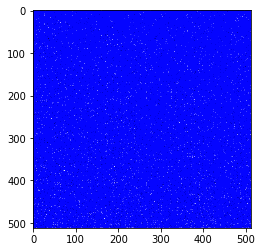

In [57]:
from matplotlib import pyplot as plt
plt.imshow(a,cmap='seismic')


In [68]:
depthwise_filters = torch.Tensor(weight_tensors[13]).permute(3,0,1,2)
groupwise_filters = torch.Tensor(weight_tensors[0]).permute(0,3,1,2)
depthwise_bias = torch.Tensor(bias_tensors[13])
groupwise_bias = torch.Tensor(bias_tensors[0])

In [72]:
bias_tensors[13][10]

1.0047193

In [7]:
import torch
import torch.nn as nn

In [70]:
input_image = torch.Tensor(np.random.normal(size=(1,32,112,112)))

intermediate = torch.nn.functional.conv2d(input_image, depthwise_filters, bias=depthwise_bias, stride=1, padding=1, dilation=1, groups=32)
intermediate = torch.nn.functional.relu(intermediate)
result_2 = torch.nn.functional.linear(torch.squeeze(intermediate).permute(1,2,0).contiguous().view(-1,32).unsqueeze(0),torch.squeeze(groupwise_filters),bias=None)
result_1 = torch.nn.functional.conv2d(intermediate,groupwise_filters,bias=groupwise_bias,stride=1,padding=0,dilation=1,groups=1)
result_2 = torch.nn.functional.relu(result_2)
result_1 = torch.nn.functional.relu(result_1)

In [57]:
torch.sum(result_1) - torch.sum(result_2)

tensor(0.0098)

In [16]:
np.save("input_image.npy",input_image.squeeze().data.numpy())
np.save("depthwise_filters.npy",depthwise_filters.squeeze().data.numpy())
np.save("result.npy",np.transpose(result_2.squeeze().data.numpy()))

In [27]:
test = result_2.squeeze().data.numpy()

In [28]:
test = np.transpose(test)

In [29]:
test[61,12543]

-1.3124201

In [68]:
intermediate.squeeze()[0]

tensor([[ 0.3831,  3.1401, -0.2365,  ..., -0.8050, -0.1198,  0.1245],
        [ 0.1245,  1.8276, -2.1608,  ..., -0.0477, -0.0148, -0.2394],
        [-0.0652,  0.7686, -0.8525,  ..., -0.5748, -0.0579,  0.3943],
        ...,
        [-0.7536,  0.3495,  0.3431,  ...,  0.4957, -1.0231, -0.2651],
        [-0.7002, -0.6451,  0.9609,  ...,  0.6272,  0.3472, -0.5790],
        [-0.0169, -0.6897,  0.1856,  ...,  0.5823,  0.4537, -0.2379]])

In [31]:
input_image.shape

torch.Size([1, 32, 112, 112])

In [33]:
result_1

tensor([[[[ 27.6783,  13.3509,   2.4749,  ...,   2.0456,  14.0760,  16.8017],
          [-17.8845, -20.6757,  -0.1477,  ..., -10.1470,   3.7224,  -7.5688],
          [  9.3705,   3.1455, -13.5922,  ...,  18.8626,  13.5485,  10.4557],
          ...,
          [  1.3922,  -6.2970,  -3.5007,  ...,  -5.7171,   6.1289,  16.2437],
          [  0.8641,   2.9974,  -2.1938,  ...,   6.6196, -19.6970, -23.5239],
          [ -5.5657,  -6.7367,  -2.7290,  ...,  -3.3473,  18.6799,  14.2540]],

         [[-26.0592,  24.4582,  24.6935,  ..., -10.0700, -16.1549,   1.1208],
          [ -2.2788,  13.5296, -18.5339,  ...,   3.3453, -13.1331, -11.1933],
          [ 14.2997, -12.3467, -21.8211,  ...,  23.3961, -20.3506,   3.8412],
          ...,
          [ -3.3056, -17.2721,  36.0502,  ...,  12.2551,  26.8922,  -5.6885],
          [  1.6112,   6.4582, -11.0355,  ..., -19.4557,  -6.5783, -44.5635],
          [  2.2428,  17.1340,  -3.4808,  ...,   5.8531,   9.1191, -10.5080]],

         [[ -1.8048,   4.3149,

In [34]:
padded_in = torch.nn.functional.pad(input_image,(8,8,1,1))
np.save("padded_input_image.npy",padded_in.squeeze().data.numpy())
padded_out = torch.nn.functional.pad(result_1,(8,8,1,1))
np.save("padded_result.npy",padded_out.squeeze().data.numpy())

In [71]:
padded_in.shape

torch.Size([1, 32, 114, 128])

In [73]:
result_1

tensor([[[[-8.2532e+00,  2.4404e-01,  2.1567e+00,  ..., -6.3138e+00,
            1.5515e+00, -1.4319e+00],
          [ 1.0238e+01, -1.9175e+00, -2.1251e+00,  ...,  1.3523e+01,
            1.2930e+01,  3.6847e+00],
          [-1.8377e+00,  1.4036e+01, -3.4309e+00,  ...,  4.6984e+00,
            5.1230e+00, -9.2765e+00],
          ...,
          [-7.1223e+00,  7.5712e+00,  1.1183e+01,  ..., -3.1568e+00,
            3.9006e+00,  9.1621e+00],
          [ 9.9815e+00,  1.0439e+00, -1.0966e+01,  ...,  8.8902e+00,
           -7.5760e+00, -3.7577e+00],
          [-5.4394e+00, -4.6471e+00,  2.2216e+00,  ..., -5.8488e+00,
           -5.7052e-01,  1.4504e+00]],

         [[ 9.6889e+00, -1.1620e+01, -6.4342e-01,  ..., -1.4074e+01,
            5.8309e+00, -2.4467e+00],
          [ 1.6686e+01,  2.3070e+01,  2.7790e+01,  ..., -1.5299e+01,
            4.1484e-01, -1.0877e+01],
          [-7.3470e+00, -2.3827e+01,  1.6164e+01,  ...,  1.1178e+01,
            3.7137e+00,  7.5952e+00],
          ...,
     

In [90]:
a = torch.Tensor(np.random.normal(size=(1,3,224,224)))

In [91]:
m = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)

In [92]:
a.shape

torch.Size([1, 3, 224, 224])

In [93]:
m(a).shape

torch.Size([1, 64, 55, 55])

In [94]:
m1 = nn.MaxPool2d(3,2)

In [95]:
m1(m(a)).shape

torch.Size([1, 64, 27, 27])